In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Supervised Learning

In [4]:
# creating supervised learning imports

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)

<IPython.core.display.Javascript object>

In [3]:
final_df = pd.read_csv("./cleaned_data.csv")

<IPython.core.display.Javascript object>

In [4]:
# Do not think event_id, app_id are necessary
final_df = final_df.drop(columns=["app_id"])

<IPython.core.display.Javascript object>

In [5]:
# Converting object data to numeric data in group column
to_num = {
    "M22-": 0,
    "M23-26": 1,
    "M27-28": 2,
    "M29-31": 3,
    "M32-38": 4,
    "M39+": 5,
    "F23-": 6,
    "F24-26": 7,
    "F27-28": 8,
    "F29-32": 9,
    "F33-42": 10,
    "F43+": 11,
}

# Created new column for numeric group, can now drop old group column
final_df["num_group"] = final_df["group"].map(to_num)
final_df = final_df.drop(columns=["group"])

<IPython.core.display.Javascript object>

In [6]:
num_cols = ["device_id", "event_id"]
# splitting up the data and choosing num_group as target variable
X = final_df.drop(columns=["num_group"])
y = final_df["num_group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=13, stratify=y
)
# set up preprocessing for pipeline (used to scale features)
preprocessing = ColumnTransformer(
    [("scale", StandardScaler(), num_cols),], remainder="passthrough",
)

<IPython.core.display.Javascript object>

In [7]:
pipeline = Pipeline(
    [("preprocessing", preprocessing), ("rf", RandomForestClassifier())], verbose=True
)

pipeline.fit(X_train, y_train)

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.8s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 6.3min


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['device_id', 'event_id'])])),
                ('rf', RandomForestClassifier())],
         verbose=True)

<IPython.core.display.Javascript object>

In [8]:
grid = {
    "rf__max_depth": [50, 70, 90, 110],
    "rf__n_estimators": [1, 10, 100],
    "rf__min_samples_leaf": [1, 3, 5, 7],
    "rf__criterion": ["gini"],
}

model = GridSearchCV(pipeline, grid, n_jobs=-1, verbose=True)
model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 55.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 79.7min finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   1.9s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 5.6min


GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scale',
                                                                         StandardScaler(),
                                                                         ['device_id',
                                                                          'event_id'])])),
                                       ('rf', RandomForestClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini'],
                         'rf__max_depth': [50, 70, 90, 110],
                         'rf__min_samples_leaf': [1, 3, 5, 7],
                         'rf__n_estimators': [1, 10, 100]},
             verbose=True)

<IPython.core.display.Javascript object>

In [9]:
model.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 110,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 100}

<IPython.core.display.Javascript object>

In [10]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 1.0
Test score: 0.5497603156035689


<IPython.core.display.Javascript object>

In [11]:
y_pred = model.predict(X_test)

con_mat = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[
        "Actually M22-",
        "Actually M23-26",
        "Actually M27-28",
        "Actually M29-31",
        "Actually M32-38",
        "Actually M39+",
        "Actually F23-",
        "Actually F24-26",
        "Actually F27-28",
        "Actually F29-32",
        "Actually F33-42",
        "Actually F43+",
    ],
    columns=[
        "Predicted M22-",
        "Predicted M23-26",
        "Predicted M27-28",
        "Predicted M29-31",
        "Predicted M32-38",
        "Predicted M39+",
        "Predicted F23-",
        "Predicted F24-26",
        "Predicted F27-28",
        "Predicted F29-32",
        "Predicted F33-42",
        "Predicted F43+",
    ],
)
con_mat.style.background_gradient(axis=None)

,Predicted M22-,Predicted M23-26,Predicted M27-28,Predicted M29-31,Predicted M32-38,Predicted M39+,Predicted F23-,Predicted F24-26,Predicted F27-28,Predicted F29-32,Predicted F33-42,Predicted F43+
Actually M22-,3148,424,204,383,598,397,111,68,92,107,124,85
Actually M23-26,404,5598,367,723,1147,827,133,137,132,183,256,173
Actually M27-28,235,466,3158,614,855,664,66,83,95,149,200,150
Actually M29-31,276,664,437,6369,1239,1073,90,117,110,173,334,202
Actually M32-38,373,890,520,941,10375,1568,119,119,180,292,490,324
Actually M39+,282,622,379,896,1608,9230,115,120,137,246,477,280
Actually F23-,154,229,85,149,282,190,1366,59,36,69,97,54
Actually F24-26,122,175,110,178,280,255,76,1065,56,81,102,62
Actually F27-28,118,216,88,204,383,281,32,49,1072,70,138,81
Actually F29-32,152,290,181,283,520,484,57,69,67,1768,172,127


<IPython.core.display.Javascript object>

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      5741
           1       0.55      0.56      0.55     10080
           2       0.53      0.47      0.50      6735
           3       0.55      0.57      0.56     11084
           4       0.55      0.64      0.59     16191
           5       0.56      0.64      0.60     14392
           6       0.59      0.49      0.54      2770
           7       0.53      0.42      0.47      2562
           8       0.50      0.39      0.44      2732
           9       0.52      0.42      0.47      4170
          10       0.52      0.46      0.49      6059
          11       0.54      0.43      0.48      4682

    accuracy                           0.55     87198
   macro avg       0.54      0.50      0.52     87198
weighted avg       0.55      0.55      0.55     87198



<IPython.core.display.Javascript object>

# Unsupervised Learning

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.cluster import (
    KMeans,
    DBSCAN,
    AffinityPropagation,
    MeanShift,
)
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

<IPython.core.display.Javascript object>

In [8]:
final_df = pd.read_csv("./cleaned_data.csv")
final_df = final_df.sample(100000, random_state=13)
# Converting object data to numeric data in group column
to_num = {
    "M22-": 0,
    "M23-26": 1,
    "M27-28": 2,
    "M29-31": 3,
    "M32-38": 4,
    "M39+": 5,
    "F23-": 6,
    "F24-26": 7,
    "F27-28": 8,
    "F29-32": 9,
    "F33-42": 10,
    "F43+": 11,
}

# Created new column for numeric group, can now drop old group column
final_df["num_group"] = final_df["group"].map(to_num)
final_df = final_df.drop(columns=["group"])

<IPython.core.display.Javascript object>

In [9]:
# Create copy of data frame and rename to be used for clustering
final_clust_df = final_df.copy()
# drop columns that won't be necessary for clustering data
final_clust_df = final_clust_df.drop(columns=['app_id',"device_id", "event_id"])

<IPython.core.display.Javascript object>

In [10]:
scaler = StandardScaler()
X_std = scaler.fit_transform(final_clust_df)
umap_results = umap.UMAP(n_components=2, n_neighbors=200)
X_umap = umap_results.fit_transform(X_std)
km = KMeans(n_clusters=6, random_state=13)
clusters = km.fit_predict(X_umap)

C:\Users\jlim7\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<IPython.core.display.Javascript object>

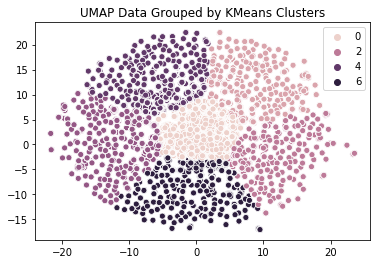

<IPython.core.display.Javascript object>

In [11]:
labels = km.fit_predict(X_umap)
sns.scatterplot(X_umap[:, 0], X_umap[:, 1], hue=labels)
plt.title("UMAP Data Grouped by KMeans Clusters")
plt.show()

In [12]:
# adding the cluster labels to the original dataframe
final_df["Cluster"] = km.labels_

<IPython.core.display.Javascript object>

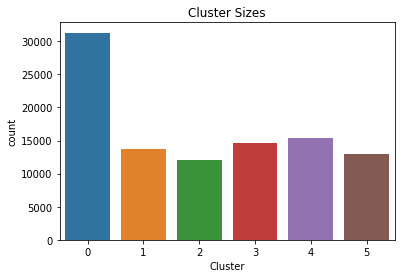

<IPython.core.display.Javascript object>

In [13]:
# Create bar chart for cluster sizes
sns.countplot(final_df["Cluster"])
plt.title("Cluster Sizes")
plt.legend
plt.show()

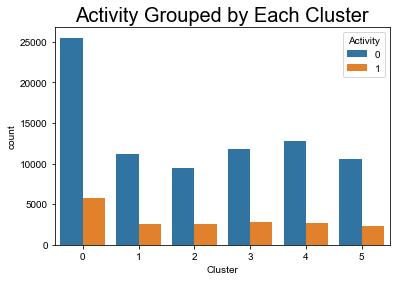

<IPython.core.display.Javascript object>

In [14]:
sns.countplot(data=final_df, x="Cluster", hue="is_active")
plt.legend(
    loc="upper right", title="Activity",
)
sns.set(rc={"figure.figsize": (10, 10)})
sns.set_style("whitegrid")
plt.title("Activity Grouped by Each Cluster", fontsize=20)
plt.show()

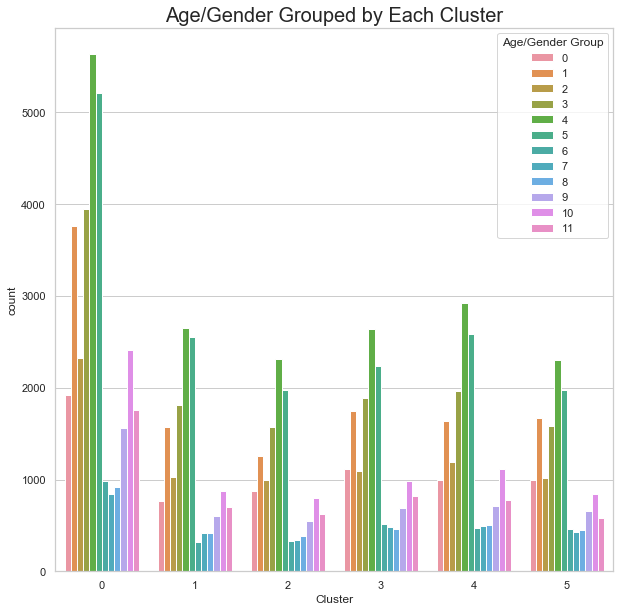

<IPython.core.display.Javascript object>

In [15]:
sns.countplot(data=final_df, x="Cluster", hue="num_group")
plt.legend(
    loc="upper right", title="Age/Gender Group",
)
sns.set(rc={"figure.figsize": (10, 10)})
sns.set_style("whitegrid")
plt.title("Age/Gender Grouped by Each Cluster", fontsize=20)
plt.show()

# Neural Network

In [16]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import (
    Activation,
    Dropout,
    Flatten,
    Dense,
    BatchNormalization,
)
from tensorflow.keras import backend as K

<IPython.core.display.Javascript object>

In [17]:
final_df = pd.read_csv("./cleaned_data.csv")

# Converting object data to numeric data in group column
to_num = {
    "M22-": 0,
    "M23-26": 1,
    "M27-28": 2,
    "M29-31": 3,
    "M32-38": 4,
    "M39+": 5,
    "F23-": 6,
    "F24-26": 7,
    "F27-28": 8,
    "F29-32": 9,
    "F33-42": 10,
    "F43+": 11,
}

# Created new column for numeric group, can now drop old group column
final_df["num_group"] = final_df["group"].map(to_num)
final_df = final_df.drop(columns=["group"])
final_df.head()

X = final_df.drop(columns=["num_group"])
y = final_df["num_group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=13, stratify=y
)

<IPython.core.display.Javascript object>

In [18]:
# Output_dim = 12 because there are 12 different age/gender groups
output_dim = 12

X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train = to_categorical(y_train, output_dim)
y_test = to_categorical(y_test, output_dim)

<IPython.core.display.Javascript object>

In [19]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(12, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
2725/2725 [==============================] - 3s 1ms/step - loss: 9882664987262976.0000 - accuracy: 0.1148
Epoch 2/20
2725/2725 [==============================] - 3s 1ms/step - loss: 1862031531573248.0000 - accuracy: 0.1461
Epoch 3/20
2725/2725 [==============================] - 3s 1ms/step - loss: 2.3092 - accuracy: 0.1857
Epoch 4/20
2725/2725 [==============================] - 3s 1ms/step - loss: 2.3080 - accuracy: 0.1857
Epoch 5/20
2725/2725 [==============================] - 3s 1ms/step - loss: 2.3080 - accuracy: 0.1857
Epoch 6/20
2725/2725 [==============================] - 3s 1ms/step - loss: 2.3080 - accuracy: 0.1857
Epoch 7/20
2725/2725 [==============================] - 3s 1ms/step - loss: 2.3080 - accuracy: 0.1857
Epoch 8/20
2725/2725 [==============================] - 3s 1ms/step - loss: 2.3080 - accuracy: 0.1857
Epoch 9/20
2725/2725 [==============================] - 3s 1ms/step - loss: 2.3080 - accuracy: 0.1857
Epoch 10/20
2725/2725 [=============================

<IPython.core.display.Javascript object>

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])

Test accuracy: 0.18568086624145508


<IPython.core.display.Javascript object>

In [21]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)

<IPython.core.display.Javascript object>

In [22]:
res = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
print(res)

tf.Tensor(
[[    0     0     0     0  5741     0     0     0     0     0     0     0]
 [    0     0     0     0 10080     0     0     0     0     0     0     0]
 [    0     0     0     0  6735     0     0     0     0     0     0     0]
 [    0     0     0     0 11084     0     0     0     0     0     0     0]
 [    0     0     0     0 16191     0     0     0     0     0     0     0]
 [    0     0     0     0 14392     0     0     0     0     0     0     0]
 [    0     0     0     0  2770     0     0     0     0     0     0     0]
 [    0     0     0     0  2562     0     0     0     0     0     0     0]
 [    0     0     0     0  2732     0     0     0     0     0     0     0]
 [    0     0     0     0  4170     0     0     0     0     0     0     0]
 [    0     0     0     0  6059     0     0     0     0     0     0     0]
 [    0     0     0     0  4682     0     0     0     0     0     0     0]], shape=(12, 12), dtype=int32)


<IPython.core.display.Javascript object>